In [3]:
import numpy as np


class EGreedy:
    """
    Implementation of EGreedy algorithm as described in Section 2 of book:
    Reinforcement Learning: An Introduction (Version 2)
    Richard S. Sutton and Andrew G. Barto
    """
    def __init__(self, k, epsilon=0.1):
        """
        Constructor of EGreedy
        :param k: [int], number of arms. 0-based indexing.
        :param epsilon: [float, default=0.1], epsilon value in range (0.0, 1.0) for exploration
        """
        self.k = k
        self.epsilon = epsilon
        self.rewards = np.asarray([0.0 for _ in range(k)])
        self.steps = np.asarray([0 for _ in range(k)])

    def reset(self):
        self.rewards = np.asarray([0.0 for _ in range(self.k)])
        self.steps = np.asarray([0 for _ in range(self.k)])

    def choose(self):
        random_number = np.random.uniform(0.0, 1, 1)[0]

        if random_number < self.epsilon:
            return np.random.choice(self.k, 1, replace=False)[0].item()
        else:
            return np.argmax(self.rewards, axis=0)

    def feedback(self, arm_id, reward):
        self.steps[arm_id] += 1
        self.rewards[arm_id] += (1 / self.steps[arm_id]) * (reward - self.rewards[arm_id])

In [14]:
num_areas = 5
# Beta probability distribution parameters for each area. Beta distros output is in range [0.0, 1.0].
# a/b represent the ratio infected/non_infected people
# So, a number b_i is sampled from each probability distro that defines the probability of an infected person
# Then, we'll draw a sample from a uniform distro (0.0, 1.0) u_i. If u_i < b_i, then we have an infected person.
beta_distro_param_1 = {'a': 10, 'b': 2}  # skewed to the right
beta_distro_param_2 = {'a': 4, 'b': 2}   # skewed to the right but less than the previous ones
beta_distro_param_3 = {'a': 2, 'b': 2}   # normal distro
beta_distro_param_4 = {'a': 2, 'b': 4}   # skewed to the left
beta_distro_param_5 = {'a': 2, 'b': 6}   # skewed even more left than the previous one

egreedy = EGreedy(k=num_areas)

num_test_kits = 5000

sum_rewards = 0.0
expected_rewards = []
choices = []
for i in range(1, num_test_kits + 1):
    area_chosen = egreedy.choose()
    
    choices.append(area_chosen)
    
    if area_chosen == 0:
        probability_of_true_positive = np.random.beta(**beta_distro_param_1)
    elif area_chosen == 1:
        probability_of_true_positive = np.random.beta(**beta_distro_param_2)
    elif area_chosen == 2:
        probability_of_true_positive = np.random.beta(**beta_distro_param_3)
    elif area_chosen == 3:
        probability_of_true_positive = np.random.beta(**beta_distro_param_4)
    else:
        probability_of_true_positive = np.random.beta(**beta_distro_param_5)
        
    random_number = np.random.uniform(0.0, 1, 1)[0]
    reward = 1.0 if random_number < probability_of_true_positive else 0.0
    
    sum_rewards += reward
    expected_rewards.append(sum_rewards / i)
    
    egreedy.feedback(arm_id=area_chosen, reward=reward)

In [15]:
import matplotlib.pyplot as plt


def plot_reward(num_iterations, reward_rates):
    plt.plot(range(1,num_iterations+1), reward_rates)
    plt.xlabel('num_iterations', fontsize=14)
    plt.ylabel('reward_rate', fontsize=14)
    plt.ylim([0,1])


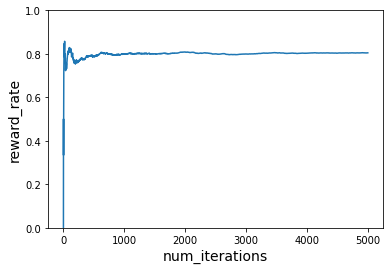

In [16]:
plot_reward(num_test_kits, expected_rewards)

In [17]:
from collections import Counter

Counter(choices)  # distribution of test kits per area

Counter({2: 114, 0: 4594, 1: 92, 4: 98, 3: 102})